<a href="https://colab.research.google.com/github/whyu38/NLP-V2_Text_analytics/blob/main/V2_Text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teks Analitik

Tujuan dari teks analitik adalah mendapatkan informasi dari data teks yang dimiliki. Berikut merupakan langkah-langkah dalam melakukan teks analitik
1. Menemukan permasalahan dan kemungkinan solusi yang dapat diberikan
2. EDA (Exploratory Data Analysis)
3. Feature Engineering
4. Modelling
5. Prediksi dari model

## 1. Menemukan permasalahan dan kemungkinan solusi yang dapat diberikan.
### 1.1 Input Data
Pada kesempatan ini akan di gunakan google colaboratory, input data dilakukan dengan membaca data yang terdapat dalam google drive, oleh karena itu pastikan bahwa google colab anda sudah tersambung dengan google drive anda.

Kode ini mengimpor modul drive dari google.colab dan menjalankan drive.mount untuk menghubungkan (me-mount) Google Drive ke lingkungan Colab.

In [ ]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Untuk mengakses data yang akan digunakan maka pastikan bahwa anda mengetahui letak data anda. Dapat dilakukan dengan menambahkan variabel baru yang menunjukkan letak data anda, atau dengan cara seperti dibawah ini dimana memposisikan notebook sama dengan data yang akan digunakan.

Upaya pertama untuk mengubah direktori (%cd) ke lokasi file "IMDB Dataset.csv". Output sel ini menunjukkan error "No such file or directory".

In [ ]:
# Letakkan posisi notebook dalam folder yang smaa dengan data yang akan digunakan
%cd "/content/gdrive/MyDrive/Semester 7/NLP/Dataset-TextAnalytics/IMDB Dataset.csv"

# Mengkonfirmasi daftar file dalam folder yang telah dipilih
%ls

[Errno 20] Not a directory: '/content/gdrive/MyDrive/Semester 7/NLP/Dataset-TextAnalytics/IMDB Dataset.csv'
/content
gdrive/  sample_data/


Menggunakan perintah %ls untuk mendaftar isi folder MyDrive guna mencari path file yang benar.

In [ ]:
# List the contents of your Google Drive
%ls "/content/gdrive/MyDrive/"

Upaya lain (%ls) untuk menemukan folder data, yang juga gagal.

In [ ]:
%ls "/content/drive/MyDrive/Semester 7/NLP/Dataset-TextAnalytics"

ls: cannot access '/content/drive/MyDrive/Semester 7/NLP/Dataset-TextAnalytics': No such file or directory


#### 1.1.1 Library yang sering digunakan dalam teks analitik
##### **NLTK**
The Natural Language Toolkit (NLTK) merupakan salah satu library yang terdapat di python untuk keperluan NLP (Natural Language Processing). Dalam NLTK terdapat beberapa corpus dengan beberapa bahasa diantaranya :
1. Tokenization
2. Stopword
3. Stemming
4. Lemmatization
5. Word2Vec

Selain yang disebutkan diatas masih banyak lagi diantaranya, untuk mencari lebih lanjut dapat mengunjungi link berikut http://www.nltk.org. NLTK termasuk library yang banyak digunakan.


##### **spaCy**
Sama seperti dengan NLTK, spaCy merupakan library untuk keperluan NLP, perbedaannya dengan NLTK selain pada corpusnya adalah spaCy biasanya banyak digunakan oleh developer. Selain itu spaCy lebih cenderung ke arah semantik, biasanya spaCy lebih banyak digunakan untuk mengerjakan
1. POS Tagging
2. NER
3. Dependency Parsing<br>


https://spacy.io/


##### **Gensim**
Gensim merupakan salah satu library dalam pengembangan NLP namun lebih mengarah ke kebutuhan seperti topic modelling, document indexing, dan similarity retrieval dimana membutuhkan resource yang besar. Gensim sering kali digunakan untuk permasalahan yang sedikit komplek dan juga dalam kebutuhan deep learning. https://radimrehurek.com/gensim/


##### **TextBlob**
TextBlob adalah library yang hampir sama seperti NLTK. Library ini biasanya banyak digunakan oleh orang-orang yang belajar basic dari NLP, kebutuhan yang ditawarkan sama yaitu untuk keperluan tokenization, pos tagging, lemmatization dan lainnya. Sejauh ini TextBlob banyak digunakan untuk mengerjakan sentimen analisis. Untuk lebih lengkapnya dapat di akses di https://textblob.readthedocs.io/en/dev/


##### **Sastrawi**
Library ini sedikit berbeda dengan library sebelumnya yang terdapat beberapa bahasa didalam-nya, sastrawi dikembangkan khusus untuk bahasa Indonesia dan corpusnya terbatas. Saat ini teks analisis untuk bahasa Indonesia semakin banyak diminati, oleh karena itu library ini sangat membantu terutama dalam proses stemming. Lebih lengkapnya dapat dilihat pada link berikut https://github.com/har07/PySastrawi


##### **Regex**
Regular expressions atau yang sering juga disebut RE atau Regex adalah library yang digunakan untuk membaca atau mendeteksi pola yang diinginkan. Regex ini banyak digunakan dalam proses data preprocessing untuk memanipulasi pola tertentu. Beberapa method yang sering dijumpai diantara compile(), match(), findall(), dan sub(), serta Matching Characters seperti "\w" yang mewakili karakter huruf [a-zA-Z], "\s" yang berarti spasi, "\d" yang mewakili digit [0-9] dan masih banyak lagi yang dapat dipelajari di https://docs.python.org/3/howto/regex.html

Sel ini mengimpor semua library utama yang akan digunakan untuk analisis, termasuk pandas, nltk, re, matplotlib, seaborn, wordcloud, dan sklearn.

In [ ]:
# Import Library yang akan dibutuhkan dalam teks analitik
import pandas as pd
import nltk
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
from nltk.util import ngrams
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Mengunduh paket data (corpus) NLTK yang diperlukan, seperti punkt (untuk tokenization), wordnet (untuk lemmatization), dan stopwords.

In [ ]:
# Download corpus nltk yang akan digunakan

## punk untuk tokenizer
nltk.download('punkt')
## wordnet untuk melakukan sentiment analysis menggunakan lexicon
nltk.download('wordnet')
## stopwords untuk membuang stopword pada teks
nltk.download('stopwords')
## tagger untuk keperluan text tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Membaca file "IMDB Dataset.csv" (menggunakan path yang benar, berbeda dari Sel 6) ke dalam DataFrame pandas bernama data_movie_review dan menampilkan 5 baris pertama (.head()).

In [ ]:
# Input Data review film dalam bahasa inggris
data_movie_review = pd.read_csv("/content/gdrive/MyDrive/Semester 7/NLP/Dataset-TextAnalytics/IMDB Dataset.csv", encoding="utf-8")
data_movie_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Menggunakan .info() untuk menampilkan ringkasan teknis DataFrame, menunjukkan 50.000 entri tanpa nilai null.

In [ ]:
# Mencari informasi dari data
data_movie_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### 1.2 Memahami Data
Dari data review movie IMDB diketahui bahwa data berjumlah 50k baris dengan 2 kolom yaitu review yang menunjukkan review atau penilaian user terhadap movie  yang terdapat di IMDB berupa kritik maupun pujian dan sentimen yang menujukkan ekspresi user tentang movie tersebut yang ditampilkan dengan 2 label yaitu positif dan negatif.
Dengan melihat data yang dimiliki maka permasalahan yang dihadapi adalah bagaimana memprediksi sentimen user melalui review yang mereka berikan terhadap movie tersebut. Penyelesaian yang akan digunakan adalah klasifikasi teks data dengan supervised learning dikarenakan sudah terdapat label didalam data tersebut.

## 2. EDA Dan Preprocessing Data
Akan dilakukan analisis untuk masing-masing sentimen.
<br>
##### **Pertanyaan Pertama**
Apakah review positif lebih banyak dibandingkan review negatif?

Menghitung jumlah (.value_counts()) sentimen positif dan negatif, lalu membuat plot batang (.plot(kind="bar")) untuk memvisualisasikannya. Output menunjukkan data seimbang (25k positif, 25k negatif).

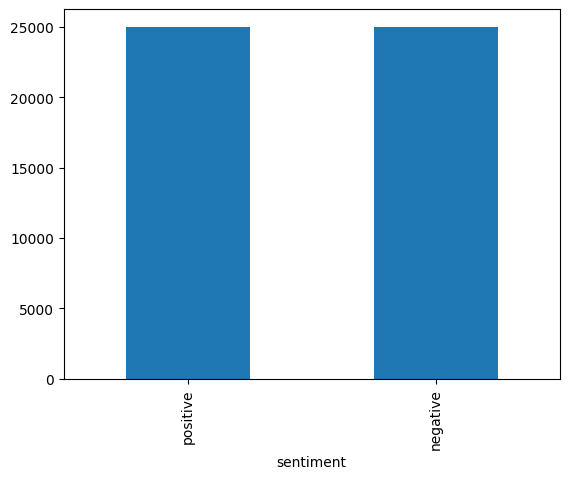

In [ ]:
# Plot sentiment dari user
sentiment_label = data_movie_review["sentiment"].value_counts()
sentiment_label.plot(kind="bar")
plt.show()

# Note : ganti visualisasi percantik lagi

**Pertanyaan Kedua**
<br>
Berapa banyak kata yang biasanya di inputkan oleh user dalam mereview produk ?
<br>
<br>
Sebelum menganalisa lebih jauh mengenai review, perlu diingat bahwa bahasa manusia sangat dinamis, selain itu terdapat beberapa pattern yang didapat saat collect data

### Preprocessing Data
Dalam Preprocessing data teks dengan kasus klasifikasi maka cleaning yang akan dilakukan diantaranya dengan normalisasi data dengan cara sebagai berikut
1. Lower/Upper casing
2. Menghilangkan pattern atau karakter yang tidak diperlukan
3. Tokenization
4. Lemmatization
5. Stemming
6. Menghilangkan Stopword

### 2.1 Lower/Upper Casting
menjadi input teks menjadi 1 format penulisan, saat ini akan digunakan lower casting

Menerapkan .lower() ke kolom "review" dan menyimpannya di kolom baru "remove_punc".

In [ ]:
# merubah input teks menjadi huruf kecil semua
# perintah lower() digunakan untuk merubah upper case menjadi lower case
data_movie_review["remove_punc"] = data_movie_review["review"].apply(lambda x: x.lower())
data_movie_review.head()

,review,sentiment,remove_punc
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


Mencetak 10 review pertama untuk memeriksa teks secara manual, mengidentifikasi adanya tag HTML (<br />) dan tanda baca.

In [ ]:
# untuk melihat bagaimana kondisi input teks dari user maka akan di perlihatkan 10 data awal untuk melihat apa saja pattern atau karakter yang tidak dibutuhkan
for i in data_movie_review["remove_punc"][:10]:
  print(i)

one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fac

### 2.2 Menghilangkan pattern atau karakter yang tidak diperlukan
Apabila dilihat dari 10 data pertama maka didapat beberapa pattern atau karakter yang tidak diperlukan diantaranya
1. format html
2. penggunaan tanda baca yang berlebihan
3. kemungkinan adanya format html

Untuk proses cleaning teks data akan digunakan regex untuk mendeteksi pattern serta karakter-karakter yang tidak diperlukan

Mendefinisikan beberapa pola Regex (html_tag, http_link, punctuation) dan sebuah fungsi data_cleaning untuk menghapus pola-pola tersebut dari teks.

In [ ]:
# Mendeteksi pattern dengan Regex
# Format html
html_tag = re.compile(r'<.*?>')

# Format URL
http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')

# Tanda baca yang tidak diperlukan
punctuation = re.compile(r'[^\w\s]') #penggunaan ^ merupakan notasi untuk menunjukkan negasi dimana dalam perintah ini berarti karakter yang bukan huruf dan bukan spasi

# Function untuk memproses cleaning teks data
def data_cleaning(text):
  # menghilangkan html tag
  text = re.sub(html_tag, r'', text)

  # menghilangkan url
  text = re.sub(http_link, r'', text)
  text = re.sub(www_link, r'', text)

  # menghilangkan tanda baca
  text = re.sub(punctuation, r'', text)

  return text


Menerapkan fungsi data_cleaning ke setiap baris di kolom "remove_punc".

In [ ]:
# Memanggil function data cleaning untuk kemudian diterapkan dalam dataframe
data_movie_review["remove_punc"] = data_movie_review["remove_punc"].apply(lambda x: data_cleaning(x))
data_movie_review.head()

,review,sentiment,remove_punc
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


Mencetak perbandingan 5 review pertama sebelum dan sesudah proses cleaning.

In [ ]:
# Membandingkan 5 data awal sebelum dan sesudah cleaning
for i, j in enumerate(data_movie_review['review'][:5]):
  print("sebelum : ", data_movie_review["review"][i] + "\n" + "sesudah : ", data_movie_review["remove_punc"][i] + "\n")

sebelum :  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

### 2.3 Tokenization

Terdapat beberapa cara dalam melakukan tokenization. Berikut diberikan 3 contoh dalam mentoken kalimat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mendemonstrasikan 3 cara tokenization (menggunakan .split(), Regex re.findall, dan NLTK word_tokenize) pada sebuah kalimat contoh.

In [ ]:
# Diberikan input kalimat sepeti berikut
input_text = "saat ini sedang berlangsung advanced machine learning oleh narasio data"

# 1. Menggunakan fungsi split() dimana akan mentoken kalimat berdasarkan spasi
token_1 = input_text.split(" ")
print("token dengan split() : ", token_1)

# 2. Menggunakan Regex, dimana menggunakan pattern untuk mendeteksi kata
token_2 = re.findall(r"\w+", input_text)
print("token dengan regex : ", token_2)

# 3. Menggunakan NLTK
import nltk
nltk.download('punkt_tab') # Download the missing resource
token_3 = word_tokenize(input_text)
print("token dengan nltk : ", token_3)

token dengan split() :  ['saat', 'ini', 'sedang', 'berlangsung', 'advanced', 'machine', 'learning', 'oleh', 'narasio', 'data']
token dengan regex :  ['saat', 'ini', 'sedang', 'berlangsung', 'advanced', 'machine', 'learning', 'oleh', 'narasio', 'data']
token dengan nltk :  ['saat', 'ini', 'sedang', 'berlangsung', 'advanced', 'machine', 'learning', 'oleh', 'narasio', 'data']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Menerapkan word_tokenize dari NLTK ke seluruh dataset di kolom "remove_punc" dan menyimpannya di kolom baru "review_clean". Kolom ini sekarang berisi daftar (list) kata-kata.

In [ ]:
# Saat ini akan digunakan NLTK untuk tokenization input user
start_time = datetime.now()

data_movie_review["review_clean"] = data_movie_review["remove_punc"].apply(lambda x: word_tokenize(x))

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

data_movie_review.head()

Waktu yang diperlukan: 0:00:32.808212


,review,sentiment,remove_punc,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


Menghitung jumlah kata (panjang list) di setiap review dan membuat plot distribusi (sns.distplot) untuk melihat sebaran jumlah kata.

/tmp/ipython-input-3165360894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_words,color='Blue')


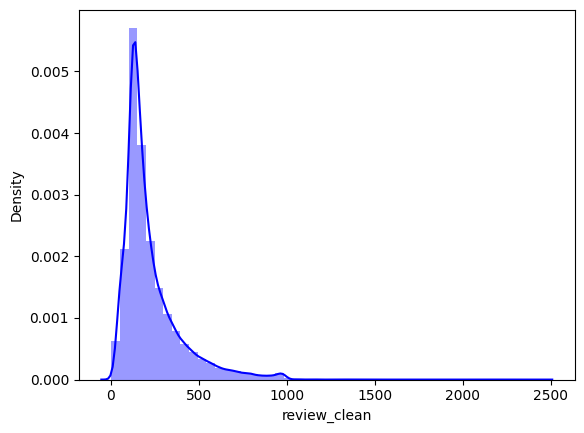

In [ ]:
# Banyaknya kata yang digunakan dalam sekali review
count_words = data_movie_review["review_clean"].apply(lambda x: len(x))
sns.distplot(count_words,color='Blue')
plt.show()

Apakah ada perbedaan banyaknya kata-kata yang digunakan dalam review positif dan negatif?

Memfilter DataFrame utama menjadi dua DataFrame baru: review_positif dan review_negatif.

In [ ]:
# memfilter berdasarkan review positif
review_positif = data_movie_review[data_movie_review["sentiment"] == "positive"]

# memfilter berdasarkan review negatif
review_negatif = data_movie_review[data_movie_review["sentiment"] == "negative"]

Membuat dua plot distribusi (distplot) berdampingan untuk membandingkan sebaran jumlah kata antara review positif (biru) dan negatif (merah).

/tmp/ipython-input-1663678234.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_positif_word,ax=ax1,color='Blue')
/tmp/ipython-input-1663678234.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_negatif_word,ax=ax2,color='Red')


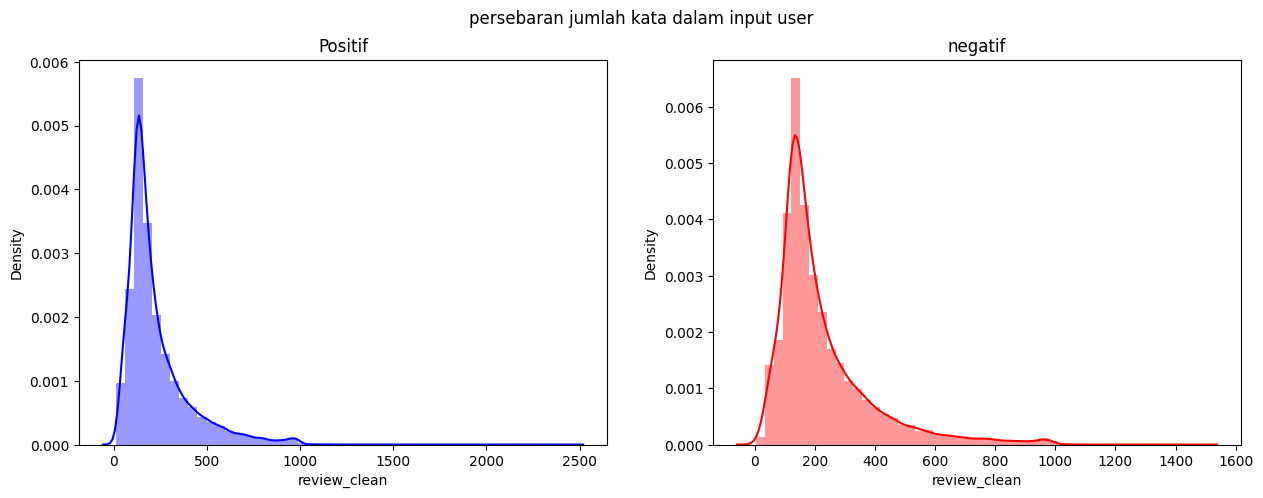

In [ ]:
# memvisualisasikan banyaknya input kata yang digunakan saat mereview movie dari masing-masing label
count_positif_word = review_positif["review_clean"].apply(lambda x: len(x))
count_negatif_word = review_negatif["review_clean"].apply(lambda x: len(x))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.distplot(count_positif_word,ax=ax1,color='Blue')
ax1.set_title("Positif")
sns.distplot(count_negatif_word,ax=ax2,color='Red')
ax2.set_title("negatif")
fig.suptitle("persebaran jumlah kata dalam input user")
plt.show()

### 2.4 Lemmatization
Lemmatization bertujuan untuk mempercepat waktu komputasi dan meningkatkan akurasi model. Dalam beberapa kasus lemmatization jarang digunakan karena tidak memberikan efek yang signifika terhadap akurasi model

Menggunakan WordNetLemmatizer dari NLTK untuk menerapkan lemmatization ke setiap kata di kolom "review_clean".

In [ ]:
# Lemmatization menggunakan NLTK
start_time = datetime.now()

lemmatizer = WordNetLemmatizer()
data_movie_review["review_clean"] = data_movie_review["review_clean"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

data_movie_review.head()

Waktu yang diperlukan: 0:00:47.500681


,review,sentiment,remove_punc,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewer, ha, mentioned,..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, wa, a, wonderful, way, to, ..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, there, a, family, where, a, little..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


### 2.5 Stemming
Tujuan dari stemming sama dengan lemmatization. Dalam penerapannya stemming menghasilkan kata dasar namun buka berarti kata tersebut sesuai dengan penulisan dalam kamus.

In [ ]:
# Stemming menggunakan NLTK
# start_time = datetime.now()

# ps = PorterStemmer()

# data_movie_review["review_clean"] = data_movie_review["review_clean"].apply(lambda x: [ps.stem(word) for word in x])

# end_time = datetime.now()
# print('Waktu yang diperlukan: {}'.format(end_time - start_time))

# data_movie_review.head()

### 2.6 Menghilangkan Stopwords
stopwords merupakan list kata-kata yang tidak menimbulkan perubahan konteks kalimat apabila dihilangkan. Stopword terdiri dari kata-kata seperti kepemilikan, kalimat tanya, partikel tambahan dan lain-lain yang dapat diakses dari corpus NLTK

Mendefinisikan daftar stop_words bahasa Inggris dari NLTK, lalu memfilter kolom "review_clean" untuk menghapus kata-kata tersebut.

In [ ]:
# stopword using nltk
start_time = datetime.now()

stop_words = set(stopwords.words('english'))

data_movie_review["review_clean"] = data_movie_review["review_clean"].apply(lambda x: [word for word in x if word not in stop_words])

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

data_movie_review.head()

Waktu yang diperlukan: 0:00:00.795404


,review,sentiment,remove_punc,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewer, ha, mentioned, watching, 1, oz..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wa, wonderful, way, spend, time, hot..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, family, little, boy, jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,..."


Menggabungkan kembali daftar kata-kata (list) di "review_clean" menjadi satu kalimat (string) utuh menggunakan " ".join(x) dan menyimpannya di kolom baru "review_movie".

In [ ]:
# Menggabungkan kata-kata menjadi satu kalimat utuh
data_movie_review["review_movie"] = data_movie_review["review_clean"].apply(lambda x: " ".join(x)) #menggabungkan kembali kata-kata dengan menambahkan spasi diantara dua kata tersebut
data_movie_review.head()

,review,sentiment,remove_punc,review_clean,review_movie
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewer, ha, mentioned, watching, 1, oz...",one reviewer ha mentioned watching 1 oz episod...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wa, wonderful, way, spend, time, hot...",thought wa wonderful way spend time hot summer...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


Memperbarui DataFrame positif_review dan negatif_review dengan data yang sudah bersih total dari kolom "review_movie".

In [ ]:
# memfilter berdasarkan review positif
positif_review = data_movie_review[data_movie_review["sentiment"] == "positive"]

# memfilter berdasarkan review negatif
negatif_review = data_movie_review[data_movie_review["sentiment"] == "negative"]

Mendefinisikan sebuah fungsi bernama display_word yang menggunakan library WordCloud untuk membuat dan menampilkan visualisasi awan kata.

In [ ]:
def display_word(data, color):
  plt.subplots(figsize=(15,15))
  word_cloud = WordCloud(width = 500, height = 300, background_color="white", contour_color=color,
                         max_words=2000, random_state=42, collocations=False)
  word_cloud.generate(' '.join(data))
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

data tweet lebih dinamis, banyak slang dan variasi tata bahasa,

Memanggil fungsi display_word untuk membuat Word Cloud dari semua review positif.

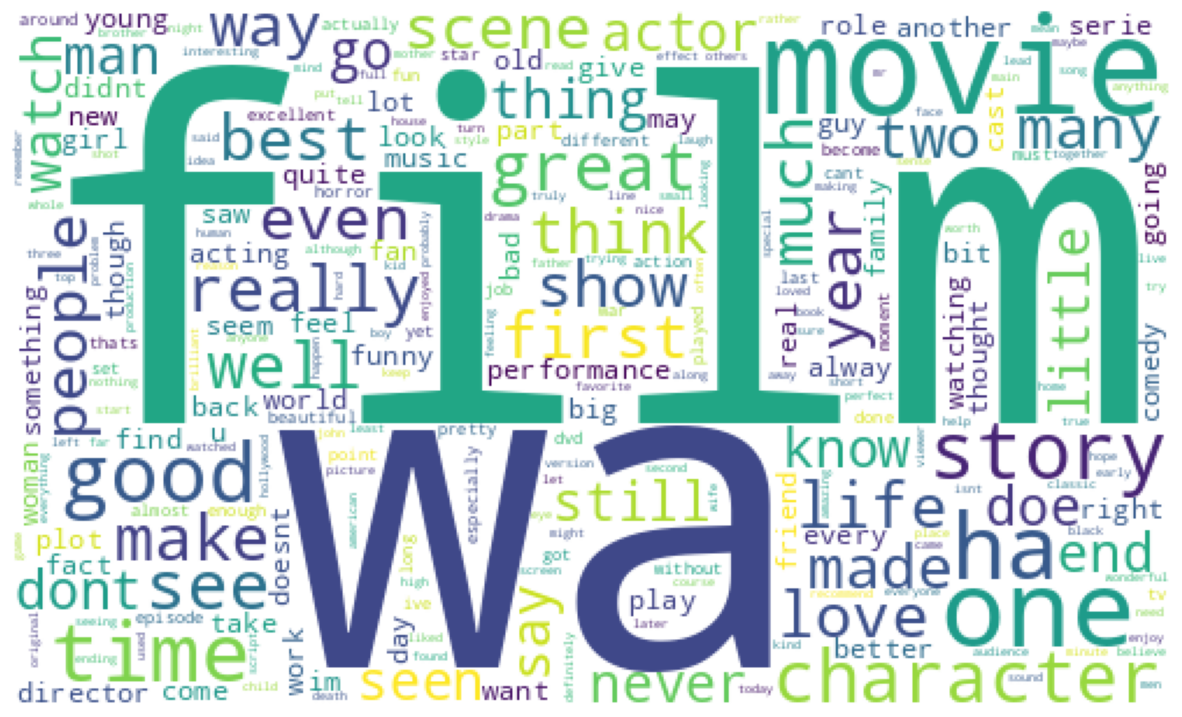

In [ ]:
# wordcloud review positif
display_word(positif_review["review_movie"],'blue')

Memanggil fungsi display_word untuk membuat Word Cloud dari semua review negatif.

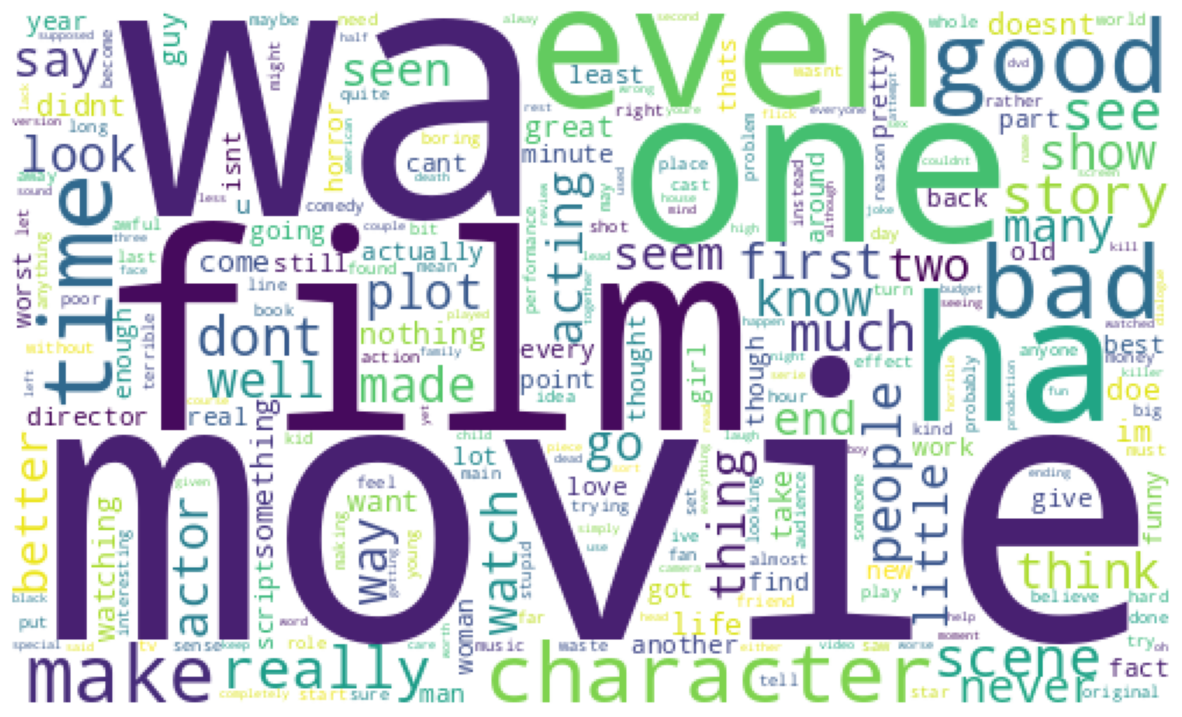

In [ ]:
# wordcloud review negatif
display_word(negatif_review["review_movie"],'blue')

Apakah ada perbadaan penggunaan kata pada masing-masing label?

Label Encoder

Menggunakan LabelEncoder dari sklearn untuk membuat kolom baru "label" yang berisi versi numerik dari kolom "sentiment".

In [ ]:
# Mengubah label string menjadi number dengan number
label_encode = LabelEncoder()

In [ ]:
data_movie_review["label"] = data_movie_review[["sentiment"]].apply(lambda x: label_encode.fit_transform(x))
data_movie_review.head(10)

,review,sentiment,remove_punc,review_clean,review_movie,label
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewer, ha, mentioned, watching, 1, oz...",one reviewer ha mentioned watching 1 oz episod...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wa, wonderful, way, spend, time, hot...",thought wa wonderful way spend time hot summer...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...,1
5,"Probably my all-time favorite movie, a story o...",positive,probably my alltime favorite movie a story of ...,"[probably, alltime, favorite, movie, story, se...",probably alltime favorite movie story selfless...,1
6,I sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...,"[sure, would, like, see, resurrection, dated, ...",sure would like see resurrection dated seahunt...,1
7,"This show was an amazing, fresh & innovative i...",negative,this show was an amazing fresh innovative ide...,"[show, wa, amazing, fresh, innovative, idea, 7...",show wa amazing fresh innovative idea 70 first...,0
8,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...,"[encouraged, positive, comment, film, wa, look...",encouraged positive comment film wa looking fo...,0
9,If you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...,"[like, original, gut, wrenching, laughter, lik...",like original gut wrenching laughter like movi...,1


### TF-IDF

Menginisialisasi TfidfVectorizer (dibatasi 5000 fitur teratas) dan menerapkannya (.fit_transform()) pada kolom "review_movie" untuk membuat matriks fitur numerik train_tfidf.

In [ ]:
# mendefinisikan tf-idf vectorizer
tfidf_vect = TfidfVectorizer()
# ubah teks pada "review_movie" menjadi document-term matrix
# dengan value diperoleh dari tf-idf
train_tfidf = tfidf_vect.fit_transform(data_movie_review["review_movie"].values.tolist())
# cek dimensi dari train_tfidf
train_tfidf.shape

(50000, 210689)

Menggunakan train_test_split untuk membagi data (matriks TF-IDF train_tfidf dan kolom label) menjadi data latih (70%) dan data uji (30%).

In [ ]:
# lakukan train-test split pada train_tfidf
X_train, X_test, y_train, y_test = train_test_split(
    # variabel prediktor diambil dari train_tfidf
    train_tfidf,
    # variabel target diambil dari kolom "label" pada "data_movie_review"
    data_movie_review['label'],
    # ambil 30% dari dataset sebagai test_size
    test_size=0.3,
    # gunakan 42 untuk seeding
    random_state=42
)

Membuat dan melatih (.fit()) model MultinomialNB (Naive Bayes) pertama menggunakan data latih (X_train, y_train). Kemudian, model digunakan untuk memprediksi (.predict()) data uji (X_test) dan mencetak akurasinya.

In [ ]:
# Modeling dengan Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
# buat prediksi dari model
predicted= clf.predict(X_test)
# cek akurasi model
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8633333333333333


Menginisialisasi TfidfVectorizer baru, kali ini menggunakan n-gram (1, 2) (unigram + bigram), dan membuat matriks fitur baru train_tfidf_1.

In [ ]:
# mendefinisikan tf-idf vectorizer baru
tfidf_vect_1 = TfidfVectorizer()
# ubah teks pada "remove_punc" menjadi document-term matrix
# dengan value diperoleh dari tf-idf
train_tfidf_1 = tfidf_vect_1.fit_transform(data_movie_review["remove_punc"].values.tolist())
# cek dimensi dari train_tfidf_1
train_tfidf_1.shape

(50000, 221910)

Membagi data baru (yang menggunakan fitur n-gram) menjadi data latih (X_train_1) dan data uji (y_train_1).

In [ ]:
# lakukan train-test split pada train_tfidf_1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    # variabel prediktor diambil dari train_tfidf_1
    train_tfidf_1,
    # variabel target diambil dari kolom "label" pada "data_movie_review"
    data_movie_review['label'],
    # ambil 30% dari dataset sebagai test_size
    test_size=0.3,
    # gunakan 42 untuk seeding
    random_state=42
)

Melatih model MultinomialNB kedua menggunakan data n-gram dan mencetak akurasi barunya.

In [ ]:
# Modeling dengan Multinomial Naive Bayes
clf_1 = MultinomialNB().fit(X_train_1, y_train_1)
# buat prediksi dari model
predicted_1= clf_1.predict(X_test_1)
# cek akurasi model
print("MultinomialNB Accuracy dengan teks dari remove_punc:", metrics.accuracy_score(y_test_1, predicted_1))

MultinomialNB Accuracy dengan teks dari remove_punc: 0.8614


In [ ]:
# mendefinisikan tf-idf vectorizer dengan n-gram dari 1 sampai 2
tfidf_vect_1 = TfidfVectorizer(ngram_range=(1,3))
# ubah teks pada "remove_punc" menjadi document-term matrix
# dengan value diperoleh dari tf-idf
train_tfidf_1 = tfidf_vect_1.fit_transform(data_movie_review["remove_punc"].values.tolist())
# cek dimensi dari train_tfidf_1
train_tfidf_1.shape

(50000, 9524505)

In [ ]:
# lakukan train-test split pada train_tfidf_1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    # variabel prediktor diambil dari train_tfidf_1
    train_tfidf_1,
    # variabel target diambil dari kolom "label" pada "data_movie_review"
    data_movie_review['label'],
    # ambil 30% dari dataset sebagai test_size
    test_size=0.3,
    # gunakan 42 untuk seeding
    random_state=42
)

In [ ]:
# Modeling dengan Multinomial Naive Bayes
clf_1 = MultinomialNB().fit(X_train_1, y_train_1)
# buat prediksi dari model
predicted_1= clf_1.predict(X_test_1)
# cek akurasi dari model
print("MultinomialNB Accuracy dengan n_gram:",metrics.accuracy_score(y_test_1, predicted_1))

MultinomialNB Accuracy dengan n_gram: 0.8926666666666667
